<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/TP3_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install wordcloud
%pip install nltk
%pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
resenha = pd.read_csv("/content/drive/MyDrive/bloco machine learning/DisneylandReviews.csv", encoding = "ISO-8859-1")
resenha.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt


# Defina a função para remover espaços em branco
def remove_whitespace(text):
    if isinstance(text, np.ndarray):
        return np.array([s.strip() for s in text])
    else:
        return text.strip()


whitespace_transformer = FunctionTransformer(remove_whitespace)

In [ ]:
resenha["Review_Text"] = whitespace_transformer.transform(resenha["Review_Text"].values)

print(resenha.Review_Text)

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around 1...
                               ...                        
42651    i went to disneyland paris in july 03 and thou...
42652    2 adults and 1 child of 11 visited Disneyland ...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in 1996, wit...
Name: Review_Text, Length: 42656, dtype: object


In [ ]:
import re


def remove_unwanted(text):
    if isinstance(text, pd.Series):
        return text.str.replace(r'[.,:;\'"-]', "", regex=True)
    elif isinstance(text, np.ndarray):
        return np.array([re.sub(r'[.,:;\'"-]', "", s) for s in text])
    else:
        return re.sub(r'[.,:;\'"-]', "", text)


unwanted_transformer = FunctionTransformer(remove_unwanted)

In [ ]:
resenha["Review_Text"] = unwanted_transformer.transform(resenha["Review_Text"].values)

In [ ]:
print(resenha.Review_Text[0][2])

In [ ]:
classificacao = resenha["Rating"].replace(
    [[1, 2], 3, [4, 5]], ["Ruim", "Neutro", "Bom"]
)

resenha["classificacao"] = classificacao
resenha.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,classificacao
0,670772142,4,2019-4,Australia,If youve ever been to Disneyland anywhere youl...,Disneyland_HongKong,Bom
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Bom
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Bom
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park Unfortun...,Disneyland_HongKong,Bom
4,670607296,4,2019-4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong,Bom


In [ ]:
print(resenha.classificacao.value_counts())

classificacao
Bom       33921
Neutro     5109
Ruim       3626
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenha.Review_Text)

In [ ]:
bag_of_words

<42656x82160 sparse matrix of type '<class 'numpy.int64'>'
	with 3511343 stored elements in Compressed Sparse Row format>

In [ ]:
vetorizar.get_feature_names_out()

array(['00', '000', '0000', ..., 'zoos', 'zootopia', 'zorbs'],
      dtype=object)

In [ ]:
pd.DataFrame.sparse.from_spmatrix(
    bag_of_words, columns=vetorizar.get_feature_names_out()
)

,00,000,0000,000000,0000hrs,0000hrsAnd,0000s,0010,0030am,0045,...,zoo,zooLots,zoom,zoomed,zooming,zooms,zoooverall,zoos,zootopia,zorbs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Com Dados Reais</h3>

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.Review_Text)
print(bag_of_words.shape)

(42656, 50)


In [ ]:
bag_of_words

<42656x50 sparse matrix of type '<class 'numpy.int64'>'
	with 897585 stored elements in Compressed Sparse Row format>

In [ ]:
vetorizar.get_feature_names_out()

array(['Disney', 'Disneyland', 'The', 'We', 'all', 'and', 'are', 'as',
       'at', 'be', 'but', 'can', 'day', 'for', 'from', 'get', 'go',
       'great', 'had', 'have', 'if', 'in', 'is', 'it', 'just', 'my',
       'not', 'of', 'on', 'one', 'or', 'our', 'park', 'ride', 'rides',
       'so', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'very',
       'was', 'we', 'were', 'with', 'you', 'your'], dtype=object)

In [ ]:
words = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words, columns=vetorizar.get_feature_names_out()
)
word_counts_sum = words.sum(axis=0)
words

,Disney,Disneyland,The,We,all,and,are,as,at,be,...,this,time,to,very,was,we,were,with,you,your
0,0,2,1,0,0,2,0,0,0,0,...,0,0,1,2,1,1,0,0,1,0
1,2,1,0,0,0,0,1,0,0,1,...,2,2,4,0,0,2,0,0,0,0
2,0,0,2,0,0,6,2,1,1,1,...,0,2,3,0,8,0,0,2,0,0
3,0,2,0,1,0,2,1,2,1,1,...,1,0,1,0,0,0,0,0,2,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0,0,0,0,6,7,1,2,2,0,...,0,0,3,1,6,2,3,0,1,0
42652,0,1,1,0,1,9,1,1,1,0,...,0,2,7,0,1,5,6,1,3,0
42653,1,2,1,2,2,7,0,1,1,0,...,0,0,8,1,2,2,1,0,0,0
42654,0,1,3,0,0,3,1,0,0,0,...,0,0,1,0,4,2,0,5,1,1


In [ ]:
from wordcloud import WordCloud

In [ ]:
def nuvem_palavras_plot(texto):
    nuvem_palavras = WordCloud(width=800, height=400).generate_from_frequencies(texto)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation="bilinear")
    plt.axis("off")
    plt.show()

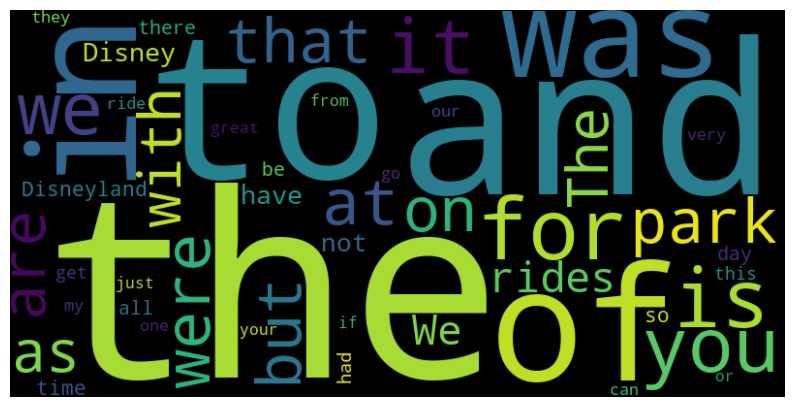

In [ ]:
nuvem_palavras_plot(word_counts_sum)

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(nuvem_palavras)
# plt.show()

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
token_pontuacao = nltk.tokenize.WordPunctTokenizer()

In [ ]:
frase_processada = []

for opiniao in resenha.Review_Text:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        # print(palavra)
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(" ".join(nova_frase))


resenha["tratamento_1"] = frase_processada

In [ ]:
resenha.tratamento_1

0        if youv ever been to disneyland anywher youll ...
1        it been a while sinc d last time we visit hk d...
2        thank god it wasn t too hot or too humid when ...
3        hk disneyland is a great compact park unfortun...
4        the locat is not in the citi took around 1 hou...
                               ...                        
42651    i went to disneyland pari in juli 03 and thoug...
42652    2 adult and 1 child of 11 visit disneyland par...
42653    my eleven year old daughter and myself went to...
42654    thi hotel part of the disneyland pari complex ...
42655    i went to the disneypari resort in 1996 with a...
Name: tratamento_1, Length: 42656, dtype: object

In [ ]:
bag_of_words_t1 = vetorizar.fit_transform(resenha.tratamento_1)

In [ ]:
words_t1 = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words_t1, columns=vetorizar.get_feature_names_out()
)
word_counts_sum_t1 = words_t1.sum(axis=0)
words_t1

,all,and,are,as,at,be,but,can,day,disney,...,to,veri,visit,wa,wait,we,were,with,you,your
0,0,2,0,0,0,0,1,0,1,0,...,1,2,1,1,0,1,0,0,1,0
1,0,0,1,0,0,1,3,0,0,2,...,4,0,1,0,0,2,0,0,0,0
2,0,6,2,1,1,1,1,0,1,0,...,3,0,1,8,0,0,0,2,0,0
3,0,2,1,2,1,1,0,1,0,0,...,1,0,1,0,0,1,0,0,2,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,6,7,1,2,2,0,1,0,0,1,...,3,1,1,6,1,2,3,0,1,0
42652,2,9,1,1,1,0,3,1,2,0,...,7,0,1,1,0,5,6,1,3,0
42653,2,7,0,1,1,0,0,0,3,1,...,8,1,1,2,0,4,1,0,0,0
42654,0,3,1,0,0,0,0,0,0,0,...,1,0,0,4,0,2,0,5,1,1


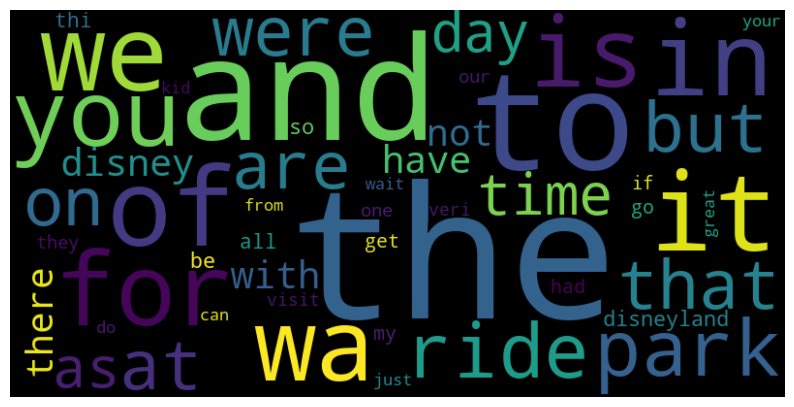

In [ ]:
nuvem_palavras_plot(word_counts_sum_t1)

In [ ]:
%%capture
%pip install -U spacy
!python -m spacy download en

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
X = resenha['Review_Text']
y = resenha.classificacao

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y ,test_size=0.1, random_state=64)

In [ ]:
test_X

41008    Tiring fun packed enjoyable Dream Castle Hotel...
40159    Disney Parks no matter where they are in the w...
25710    I normally visit off season and now I remember...
23097    I really enjoyed the Halloween decorations esp...
5211     Must visit this place when you are in HK It le...
                               ...                        
5497     My wife and I went to Disneyland Hong Kong in ...
29177    Recently had 4 nights at the Disney hotel & 3 ...
36937    Have visited Disneyland Paris about 30 times n...
9584     The park is too small and does not have enough...
24227    Nice to back to Disneyland after many trips to...
Name: Review_Text, Length: 4266, dtype: object

In [ ]:
frase_processada = []

for opiniao in test_X:
    nova_frase = []
    palavras_texto = token_pontuacao.tokenize(opiniao)
    doc = nlp(str([palavra for palavra in palavras_texto]))
    for token in doc:
        if token.pos_ == "NOUN":
            nova_frase.append(token.lemma_)
    frase_processada.append(" ".join(nova_frase))

In [ ]:
test_y

41008     Bom
40159     Bom
25710    Ruim
23097     Bom
5211      Bom
         ... 
5497      Bom
29177     Bom
36937     Bom
9584     Ruim
24227     Bom
Name: classificacao, Length: 4266, dtype: object

In [ ]:
test_df = pd.DataFrame(test_y)
test_df['Review_Text'] = test_X
test_df['Review_Lemm'] = frase_processada

In [ ]:
test_df

,classificacao,Review_Text,Review_Lemm
41008,Bom,Tiring fun packed enjoyable Dream Castle Hotel...,fun hotel evening buffet choice breakfast food...
40159,Bom,Disney Parks no matter where they are in the w...,disney matter world person dream ride tour mag...
25710,Ruim,I normally visit off season and now I remember...,season fact twilight ticket ride joke ride par...
23097,Bom,I really enjoyed the Halloween decorations esp...,decoration a day whip day
5211,Bom,Must visit this place when you are in HK It le...,place let child place disney character parade ...
...,...,...,...
5497,Bom,My wife and I went to Disneyland Hong Kong in ...,wife day disney amusement park ride rope way p...
29177,Bom,Recently had 4 nights at the Disney hotel & 3 ...,night disney hotel day park adult child child ...
36937,Bom,Have visited Disneyland Paris about 30 times n...,disney dream edition parade time parade value ...
9584,Ruim,The park is too small and does not have enough...,park ride side show parade people queue people...


In [ ]:
bag_of_words_t2 = vetorizar.fit_transform(test_df.Review_Lemm)

words_t2 = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words_t2, columns=vetorizar.get_feature_names_out()
)
word_counts_sum_t2 = words_t2.sum(axis=0)
words_t2

,adult,area,attraction,bit,character,child,crowd,daughter,day,disney,...,staff,theme,thing,ticket,time,train,trip,way,world,year
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,3,...,1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,4,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4262,2,1,0,0,5,9,0,0,4,3,...,0,0,0,0,1,1,0,0,0,1
4263,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4264,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


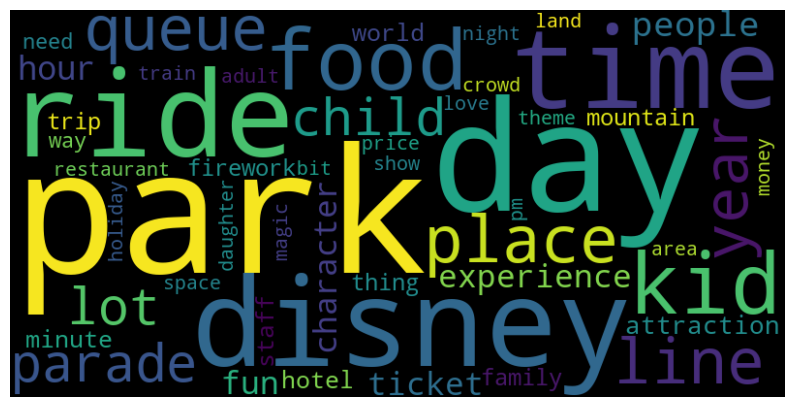

In [ ]:
nuvem_palavras_plot(word_counts_sum_t2)

In [ ]:
%%capture
%pip install seaborn

In [ ]:
import seaborn as sns
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),"Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()


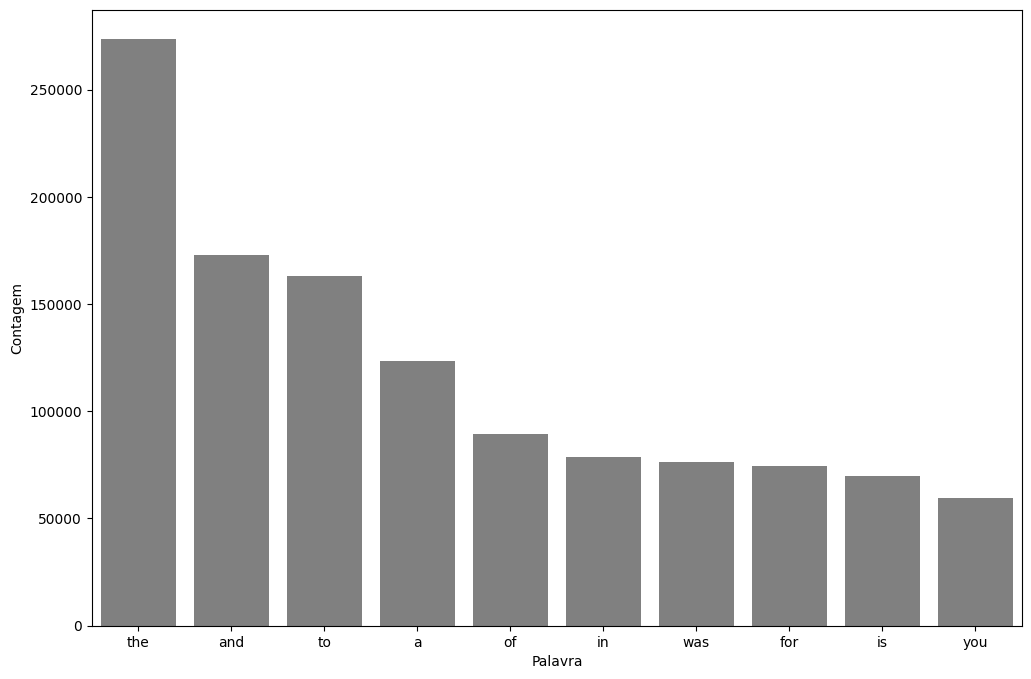

In [ ]:
pareto(resenha, "Review_Text", 10)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("english")

frase_processada = list()
for opiniao in resenha.Review_Text:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))



In [ ]:
resenha["tratamento_2"] = frase_processada

In [ ]:
resenha.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,classificacao,tratamento_1,tratamento_2
0,670772142,4,2019-4,Australia,If youve ever been to Disneyland anywhere youl...,Disneyland_HongKong,Bom,if youv ever been to disneyland anywher youll ...,If youve ever Disneyland anywhere youll find D...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Bom,it been a while sinc d last time we visit hk d...,Its since last time visit HK Disneyland Yet ti...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Bom,thank god it wasn t too hot or too humid when ...,Thanks God hot humid I visiting park otherwise...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park Unfortun...,Disneyland_HongKong,Bom,hk disneyland is a great compact park unfortun...,HK Disneyland great compact park Unfortunately...
4,670607296,4,2019-4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong,Bom,the locat is not in the citi took around 1 hou...,location city took around 1 hour Kowlon kids l...


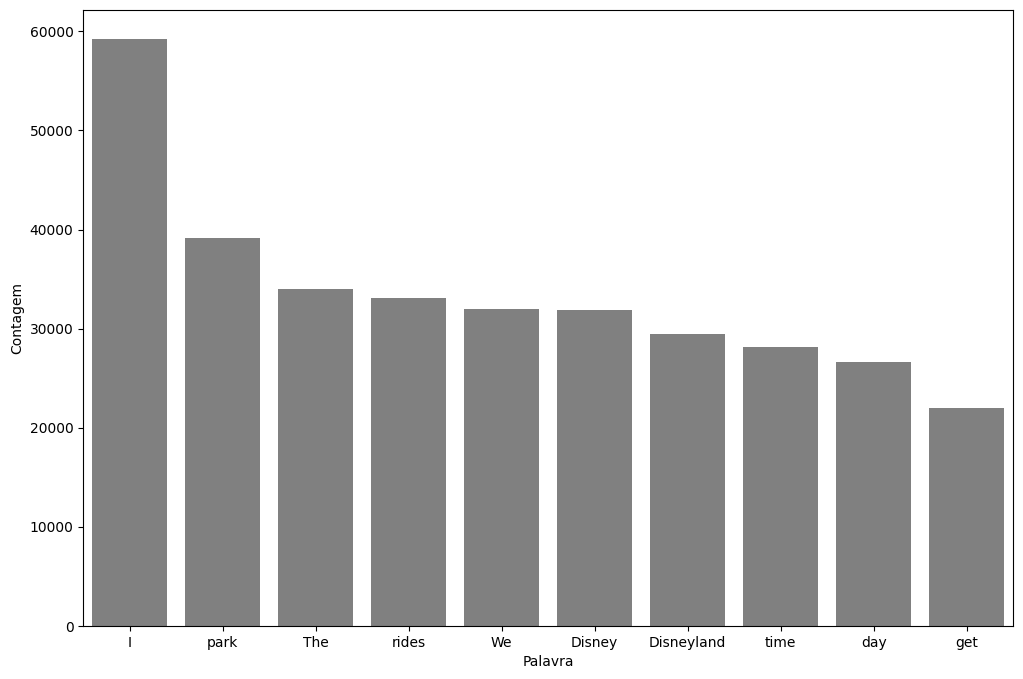

In [ ]:
pareto(resenha, "tratamento_2", 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                texto[coluna_classificacao],
                                                                random_state = 64)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [ ]:
print(classificar_texto(resenha, "Review_Text", "classificacao"))

0.8014816204051013


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classificar_texto(resenha, "tratamento_1", "classificacao"))
print(classificar_texto(resenha, "tratamento_2", "classificacao"))



0.8012003000750187
0.7952925731432858


0.7952925731432858


In [ ]:
print(classificar_texto(test_df, "Review_Text", "classificacao"))
print(classificar_texto(test_df, "Review_Lemm", "classificacao"))


0.7938144329896907
0.7985004686035614


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tf_idftratado_base = tfidf.fit_transform(resenha['Review_Text'])
tfidf.get_feature_names_out()

array(['Disney', 'Disneyland', 'The', 'We', 'all', 'and', 'are', 'as',
       'at', 'be', 'but', 'can', 'day', 'for', 'from', 'get', 'go',
       'great', 'had', 'have', 'if', 'in', 'is', 'it', 'just', 'my',
       'not', 'of', 'on', 'one', 'or', 'our', 'park', 'ride', 'rides',
       'so', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'very',
       'was', 'we', 'were', 'with', 'you', 'your'], dtype=object)

In [ ]:
treino, teste , classe_treino, classe_teste = train_test_split(tf_idftratado_base,
                                                                resenha['classificacao']
                                                                ,random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratado)

0.7961365341335334


In [ ]:
tf_idftratado_1 = tfidf.fit_transform(resenha['tratamento_1'])
tfidf.get_feature_names_out()

array(['all', 'and', 'are', 'as', 'at', 'be', 'but', 'can', 'day',
       'disney', 'disneyland', 'do', 'for', 'from', 'get', 'go', 'great',
       'had', 'have', 'if', 'in', 'is', 'it', 'just', 'kid', 'my', 'not',
       'of', 'on', 'one', 'our', 'park', 'ride', 'so', 'that', 'the',
       'there', 'they', 'thi', 'time', 'to', 'veri', 'visit', 'wa',
       'wait', 'we', 'were', 'with', 'you', 'your'], dtype=object)

In [ ]:
treino, teste , classe_treino, classe_teste = train_test_split(tf_idftratado_1,
                                                                resenha['classificacao']
                                                                ,random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratado)

0.7982933233308327


In [ ]:
tf_idftratado_2 = tfidf.fit_transform(resenha['tratamento_2'])
tfidf.get_feature_names_out()

array(['Disney', 'Disneyland', 'It', 'The', 'This', 'We', 'also',
       'around', 'back', 'characters', 'children', 'day', 'days', 'even',
       'experience', 'fast', 'first', 'food', 'fun', 'get', 'go', 'good',
       'great', 'kids', 'like', 'long', 'many', 'much', 'one', 'parade',
       'park', 'parks', 'pass', 'people', 'place', 'really', 'ride',
       'rides', 'see', 'show', 'still', 'time', 'times', 'us', 'visit',
       'wait', 'well', 'went', 'would', 'year'], dtype=object)

In [ ]:
treino, teste , classe_treino, classe_teste = train_test_split(tf_idftratado_2,
                                                                resenha['classificacao']
                                                                ,random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratado)

0.7963240810202551


In [ ]:
tf_idftratado_Lemm = tfidf.fit_transform(test_df.Review_Lemm)
tfidf.get_feature_names_out()

array(['adult', 'area', 'attraction', 'bit', 'character', 'child',
       'crowd', 'daughter', 'day', 'disney', 'experience', 'family',
       'firework', 'food', 'fun', 'holiday', 'hotel', 'hour', 'kid',
       'land', 'line', 'lot', 'love', 'magic', 'minute', 'money',
       'mountain', 'need', 'night', 'parade', 'park', 'people', 'place',
       'pm', 'price', 'queue', 'restaurant', 'ride', 'show', 'space',
       'staff', 'theme', 'thing', 'ticket', 'time', 'train', 'trip',
       'way', 'world', 'year'], dtype=object)

In [ ]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(tf_idftratado_Lemm, test_df.classificacao )
acuracia_tfidf_tratado = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratado)

0.7823518379594899
